<a href="https://colab.research.google.com/github/joshIsac/DeepLearningLab/blob/main/2348523_DL_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [116]:
def optimization(w):
  return 0.5*w**2-30*w +100
#derivative
def df(w):
  return w-30
# Initialize parameters
w = 20  # initial price
v = 0  # momentum term
lr = 0.1
momentum = 0.9

# Perform iterations
for i in range(5):
 v = momentum * v - lr * df(w)
 w= w+v
 print("Iteration", i+1, "- Optimal price:", w)

# Print the optimal price after 5 iterations
print("The optimal price after 5 iterations is:", w)

Iteration 1 - Optimal price: 21.0
Iteration 2 - Optimal price: 22.8
Iteration 3 - Optimal price: 25.14
Iteration 4 - Optimal price: 27.732
Iteration 5 - Optimal price: 30.2916
The optimal price after 5 iterations is: 30.2916


In [117]:
#2)excercise
healthcare_df=pd.read_csv('/content/drive/MyDrive/healthcare_dataset.csv')
healthcare_df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [118]:
healthcare_df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [119]:
healthcare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [120]:
healthcare_df.describe(include='object')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,1815,9416,8639,5,3,1834,5,3
top,Michael Johnson,Female,AB-,Asthma,2019-04-12,Michael Johnson,Smith PLC,Cigna,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,5075,1275,1708,15,7,19,2040,3391,14,2079,3456


In [144]:
healthcare_df['Medical Condition'].unique()

array([7, 6, 5, 2, 0, 3, 1, 4])

In [121]:
#count of gender
count_gender=healthcare_df['Gender'].value_counts()
print("gendercounts:",count_gender)
#count of blood group
bloodgroup=healthcare_df['Blood Type'].value_counts()
print("blood group type counts is :",bloodgroup)

disease_count=healthcare_df['Medical Condition'].value_counts()
print("disease counts is :",disease_count)

gendercounts: Female    5075
Male      4925
Name: Gender, dtype: int64
blood group type counts is : AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: Blood Type, dtype: int64
disease counts is : Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: Medical Condition, dtype: int64


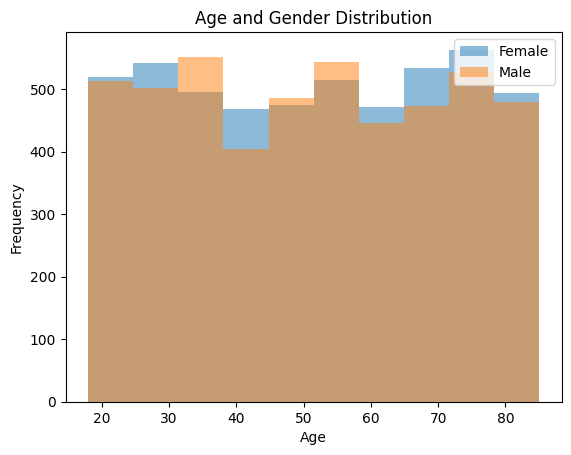

In [122]:
#Plotting the age and gender distribution
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called healthcare_df with 'Age' and 'Gender' columns
healthcare_df.groupby('Gender')['Age'].plot(kind='hist', alpha=0.5, legend=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age and Gender Distribution')
plt.show()


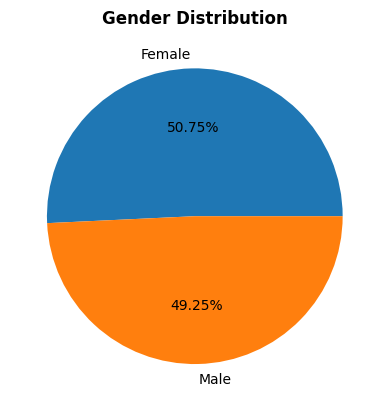

In [123]:
plt.title("Gender Distribution", fontsize = 12, weight='bold')
plt.pie(count_gender,labels=count_gender.index,radius=1, autopct='%.2f%%')
plt.show()

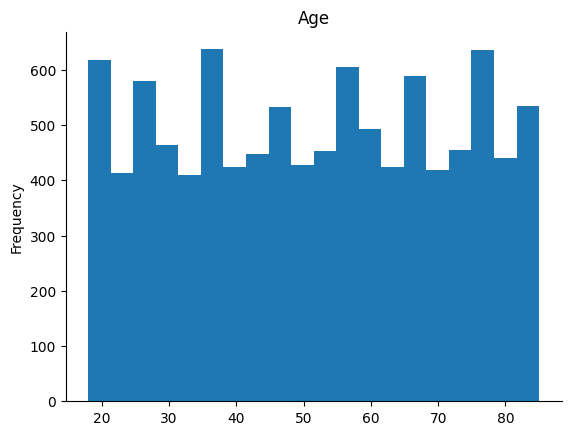

In [124]:
# @title Age
from matplotlib import pyplot as plt
healthcare_df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

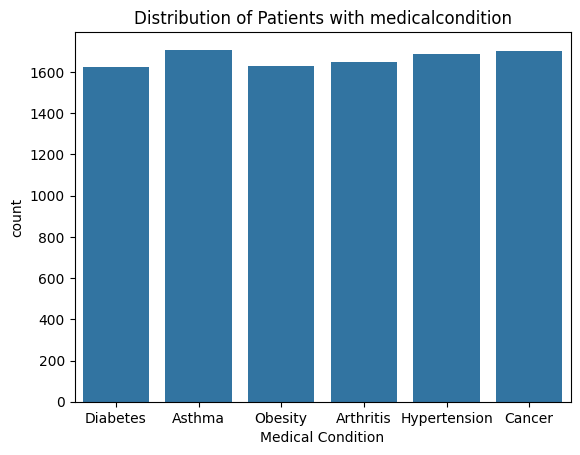

In [125]:
sn.countplot(data = healthcare_df, x = 'Medical Condition')
plt.title("Distribution of Patients with medicalcondition")
plt.show()

In [126]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
lb = LabelEncoder()
cat_cols = [col for col in healthcare_df.columns if healthcare_df[col].dtype == 'object']
for col in cat_cols:
    healthcare_df[col] = lb.fit_transform(healthcare_df[col])
healthcare_df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,8837,81,0,7,3,1468,7167,7960,3,37490.983364,146,0,1476,0,1
1,7736,35,1,6,1,1664,2597,978,4,47304.064845,404,1,1672,2,2
2,1508,61,1,5,5,71,7180,7996,3,36874.896997,292,1,96,2,2
3,721,49,1,5,1,548,1169,2482,3,23303.322092,480,2,544,4,0
4,6782,51,1,7,0,980,2775,3908,4,18086.344184,477,2,996,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3582,83,1,0,5,1359,7926,8474,4,39606.840083,110,0,1355,1,0
9996,8307,47,0,2,0,1159,1856,5394,1,5995.717488,244,1,1172,1,2
9997,1792,54,1,5,0,1331,7655,4214,1,49559.202905,312,0,1337,1,2
9998,273,84,1,0,0,462,3770,8420,4,25236.344761,420,2,477,4,2


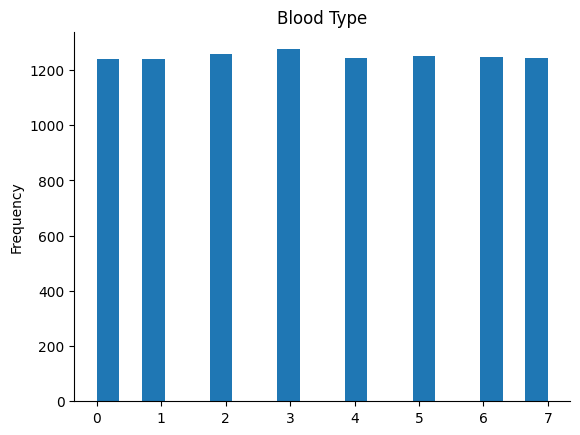

In [127]:
# @title Blood Type distribution
from matplotlib import pyplot as plt
healthcare_df['Blood Type'].plot(kind='hist', bins=20, title='Blood Type')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

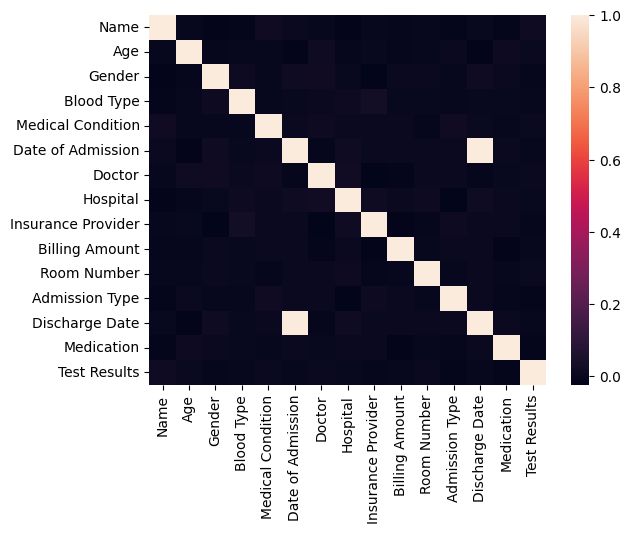

In [128]:
sn.heatmap(healthcare_df.corr())

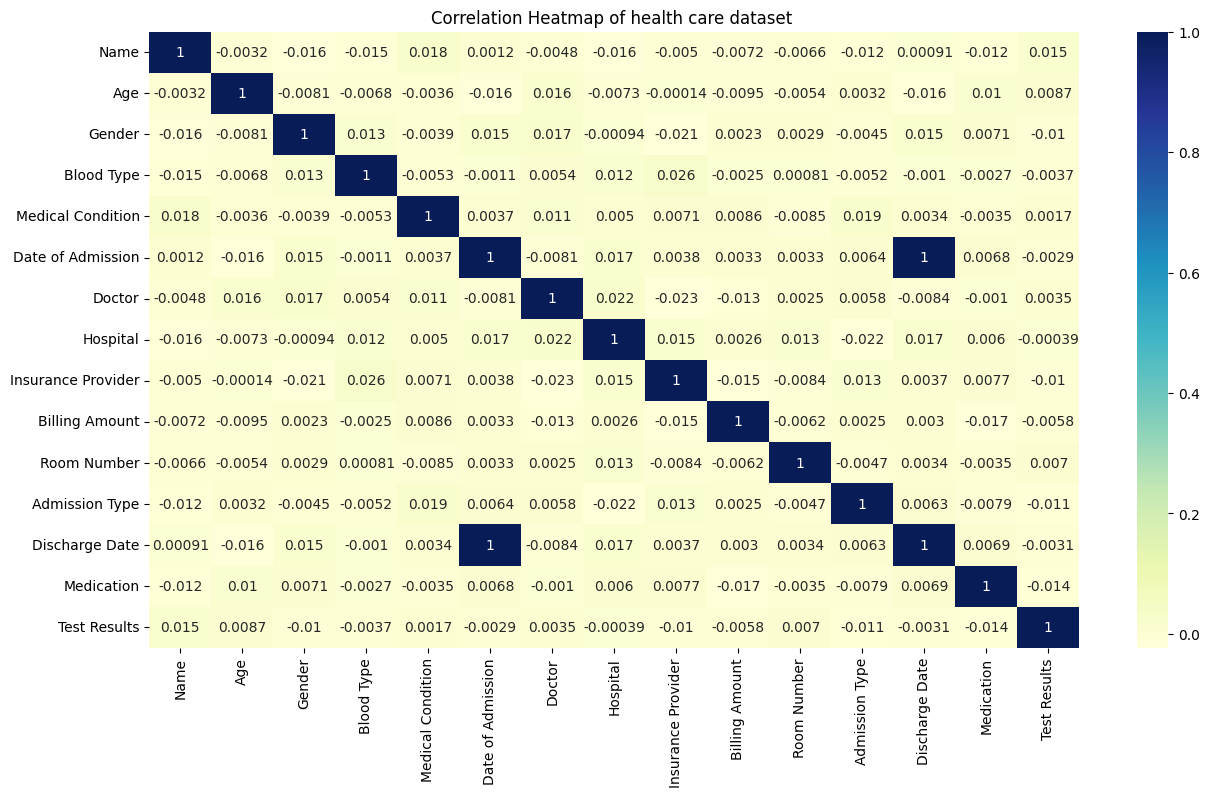

In [129]:
plt.figure(figsize=(15, 8))
sn.heatmap(healthcare_df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap of health care dataset ')
plt.show()

In [131]:
X=healthcare_df.drop(columns=['Medical Condition'])
Y = healthcare_df['Medical Condition']

In [133]:
X.shape

(10000, 14)

In [134]:
Y.shape

(10000,)

In [135]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [136]:

from sklearn.model_selection import train_test_split

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Print the shapes of train and test sets
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (7000, 14) (7000,)
Test set: (3000, 14) (3000,)


In [137]:
import tensorflow as tf
import numpy as np
from keras import layers, Sequential, regularizers
from imblearn.over_sampling import RandomOverSampler
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [145]:
model1 = Sequential()
#with 128 input nodes
model1 = Sequential()
model1.add(Dense(units=128, activation='elu', input_dim=X_train.shape[1]))
model1.add(Dense(units=64, activation='elu'))
model1.add(Dense(units=1, activation='sigmoid'))
print(model1.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               1920      
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10241 (40.00 KB)
Trainable params: 10241 (40.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [146]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: -65.6196 - accuracy: 0.1761 - val_loss: -312.0367 - val_accuracy: 0.1647
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: -1492.6646 - accuracy: 0.1734 - val_loss: -3521.7019 - val_accuracy: 0.1647
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: -7396.7241 - accuracy: 0.1734 - val_loss: -12692.8096 - val_accuracy: 0.1647
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: -20482.5605 - accuracy: 0.1734 - val_loss: -30257.6328 - val_accuracy: 0.1647
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: -42736.2656 - accuracy: 0.1734 - val_loss: -57858.1641 - val_accuracy: 0.1647
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: -75821.8047 - accuracy: 0.1734 - val_loss: -97047.2422 - val_accuracy: 0.1647
Epoch 7/100
219/219 [==============================] - 1s 2ms/step - loss: -121124.8438 - 